In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df =pd.read_csv("data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['date_added','rating','duration'],inplace=True)
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df['director']= df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')

In [12]:
df.to_csv('data/netflix_cleaned.csv')

In [13]:
# now we will work with cleaned data 
df =pd.read_csv('data/netflix_cleaned.csv')

C:\Users\harsh\AppData\Local\Temp\ipykernel_21636\1783282423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='Set2')


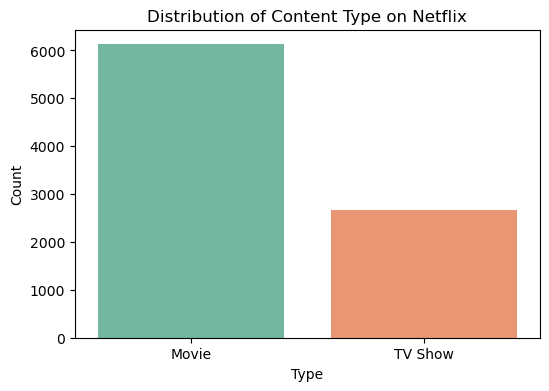

In [14]:
# Distribution of content type (Movies vs TV Shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='type',palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_21636\1928527748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette='viridis')


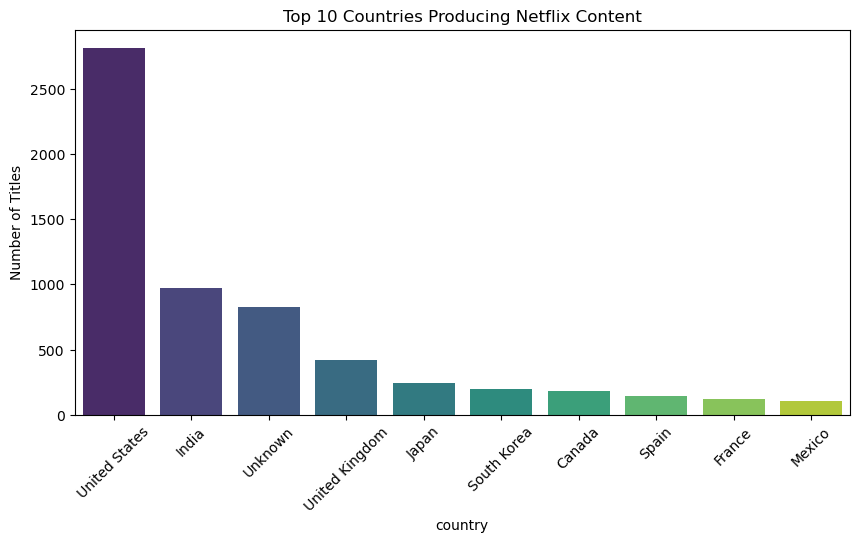

In [15]:
# Top 10 countries with most content
top_countries =df['country'].value_counts().head(10)
top_countries
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index,y=top_countries.values,palette='viridis')
plt.title('Top 10 Countries Producing Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

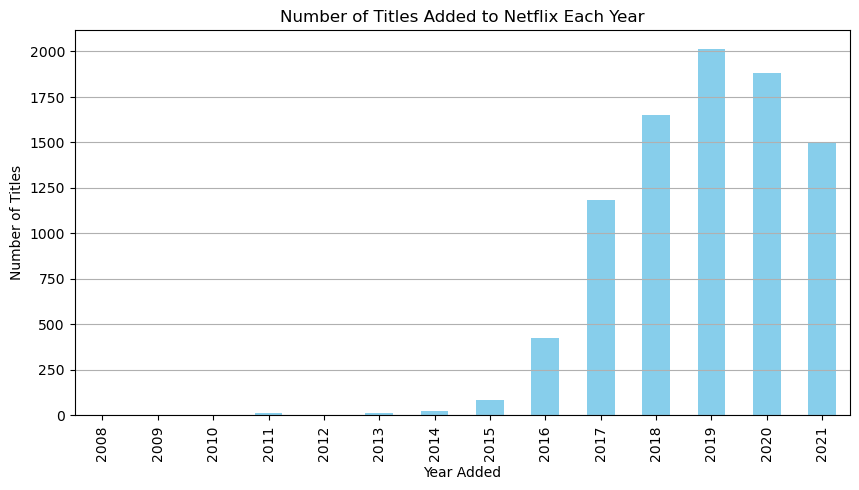

In [16]:
# content added over the years
df['date_added']= df['date_added'].astype(str).str.strip()
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['release_year']=df['date_added'].dt.year

# Plot
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()



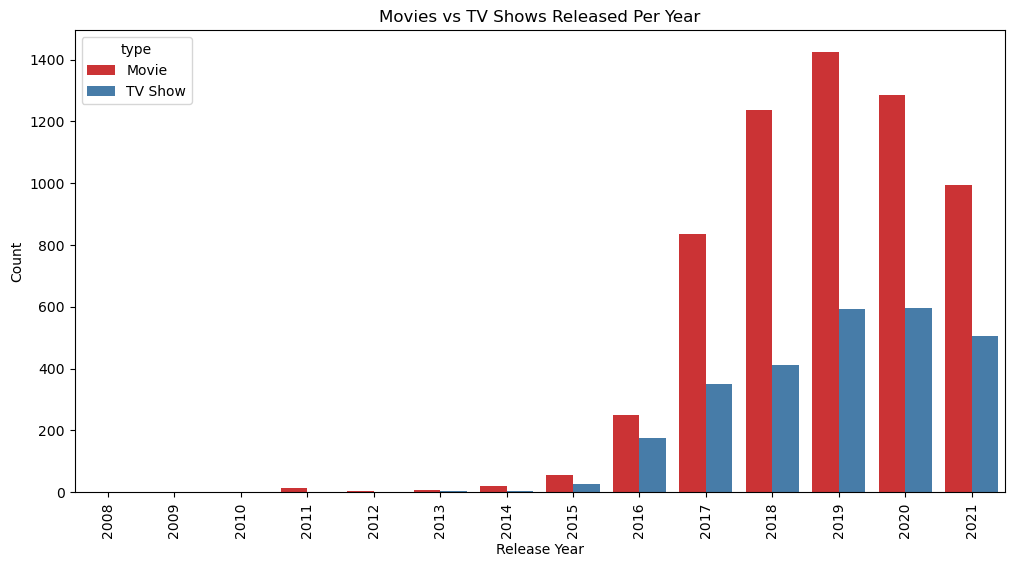

In [17]:
# Number of Movies vs TV Shows released per Year
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='release_year',hue='type',palette='Set1',order=sorted(df['release_year']))
plt.title('Movies vs TV Shows Released Per Year')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_21636\981084363.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index,palette='crest')


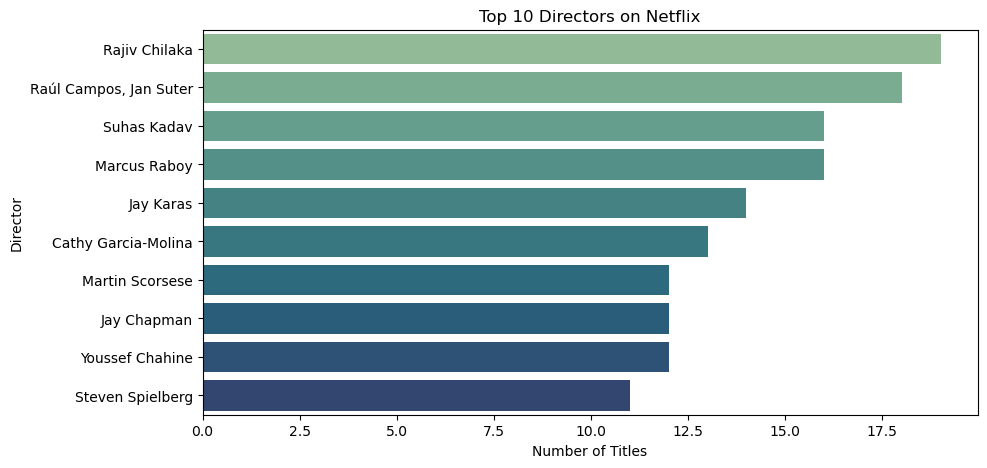

In [20]:
# Top 10 directors with most content 
top_directors = df['director'].value_counts().drop('Unknown').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index,palette='crest')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_21636\4198411430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actors_df, x='Appearances', y='Actor', palette='plasma')


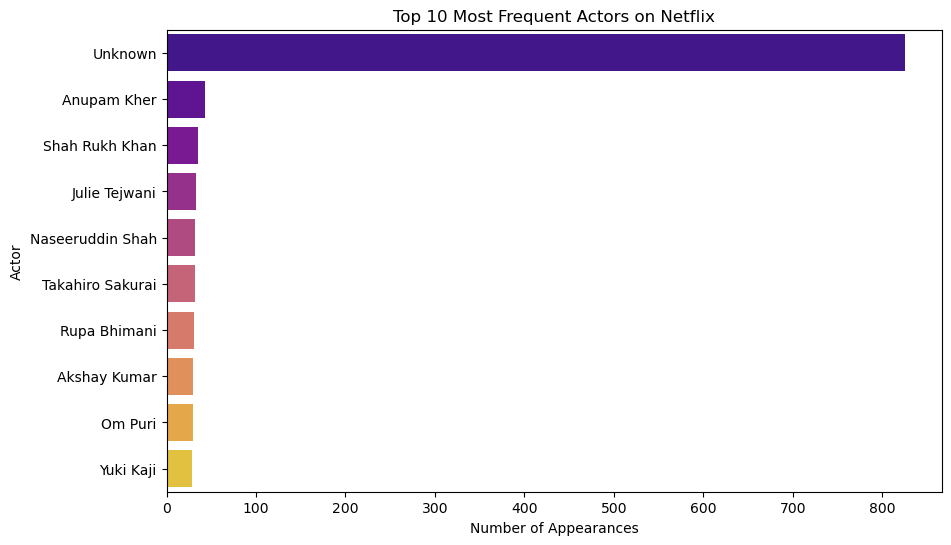

In [22]:
# Top 10 Actors appearing most often
from collections import Counter

cast_series = df['cast'].dropna().apply(lambda x: x.split(', '))
all_actors=sum(cast_series,[])

top_actors = Counter(all_actors).most_common(10)
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Appearances'])

plt.figure(figsize=(10, 6))
sns.barplot(data=actors_df, x='Appearances', y='Actor', palette='plasma')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()
